In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [237]:
def add_new_year(Year):
    #DOB Filter empty year
    dead = pd.read_fwf('./deces-' + str(Year) + '.txt',widths=(80,1,8,5,30,30,8,5),header=0,names=('NomPrenom','Sexe','DOB','CodeLieuxNaissance','AdressseNaissance','Etranger','DOD','CodeLieuDeces'), encoding= 'unicode_escape')
    dead.drop(dead[dead['DOB']/10**7%10==0].index,inplace=True)
    dead.drop(dead[dead['DOB']/10**6%10==0].index,inplace=True)    
    #DOB Filter empty day and force 00 to 01
    dead['DOB'] = np.where((dead['DOB']%10==0) & (dead['DOB']/10%10==0), dead['DOB'] + 1, dead['DOB'])
    #DOB Filter empty month and force 00 to 01
    dead['DOB'] = np.where((np.trunc(dead['DOB']/100%10)==0) & (np.trunc(dead['DOB']/1000%10)==0), dead['DOB'] + 100, dead['DOB'])
    
    #DOD Filter empty year
    dead.drop(dead[dead['DOD']<19000101].index,inplace=True)
    dead.drop(dead[dead['DOD']/10**7%10==0].index,inplace=True)
    dead.drop(dead[dead['DOD']/10**6%10==0].index,inplace=True)    
    #DOD Filter empty day and force 00 to 01
    dead['DOD'] = np.where((dead['DOD']%10==0) & (dead['DOD']/10%10==0), dead['DOD'] + 1, dead['DOD'])
    #DOD Filter empty month and force 00 to 01
    dead['DOD'] = np.where((np.trunc(dead['DOD']/100%10)==0) & (np.trunc(dead['DOD']/1000%10)==0), dead['DOD'] + 100, dead['DOD'])
    
    #Remove '/' in Col 1
    dead.iloc[:,0]=dead.iloc[:,0].str[:-1]
    #Split Name * Col 1
    dead[['Last','First']] = dead.NomPrenom.str.split("*",expand=True)
    dead.drop(columns='NomPrenom',inplace=True)
    # shift column to first position
    first = dead.pop('Last')
    second = dead.pop('First')

    dead.insert(0, 'Last', first)
    dead.insert(0, 'First', second)
    #Change format DOB, DOD
    dead["DOB"] = pd.to_datetime(dead["DOB"], yearfirst=True, errors='coerce', dayfirst=False, format="%Y%m%d")
    dead["DOD"] = pd.to_datetime(dead["DOD"], yearfirst=True, dayfirst=False, format="%Y%m%d")
    dead["Age"]= (dead["DOD"] - dead["DOB"])/np.timedelta64(1,'Y')
    dead.drop(dead[dead['Age']>130].index,inplace=True)
    dead.drop(dead[dead['Age']<=0].index,inplace=True)
    #Departement Naissance
    dead['DEP_B'] = np.trunc(dead['CodeLieuxNaissance']/1000)
    dead=dead.astype({'DEP_B': 'int64'})
    return dead

In [238]:
dead=add_new_year(1978)

In [240]:
dead.corr()

,Sexe,CodeLieuxNaissance,Etranger,CodeLieuDeces,Age,DEP_B
Sexe,1.000000,-0.004450,NaN,0.004912,0.185733,-0.004424
CodeLieuxNaissance,-0.004450,1.000000,NaN,0.571272,-0.045585,0.999974
Etranger,NaN,NaN,NaN,NaN,NaN,NaN
CodeLieuDeces,0.004912,0.571272,NaN,1.000000,-0.035448,0.571070
Age,0.185733,-0.045585,NaN,-0.035448,1.000000,-0.045514
DEP_B,-0.004424,0.999974,NaN,0.571070,-0.045514,1.000000


In [239]:
dead.describe()

,Sexe,CodeLieuxNaissance,Etranger,CodeLieuDeces,Age,DEP_B
count,420663.000000,420663.000000,0.0,420663.000000,420663.000000,420663.000000
mean,1.449783,50187.343715,NaN,52416.681757,68.295696,49.960248
std,0.497472,24460.198977,NaN,26268.234584,17.601814,24.453053
min,1.000000,1001.000000,NaN,0.000000,0.002738,1.000000
25%,1.000000,29232.000000,NaN,31483.000000,62.862345,29.000000
50%,1.000000,56127.000000,NaN,57463.000000,73.507327,56.000000
75%,2.000000,71547.000000,NaN,75110.000000,80.212462,71.000000
max,2.000000,95680.000000,NaN,99999.000000,87.990855,95.000000


(50.0, 90.0)

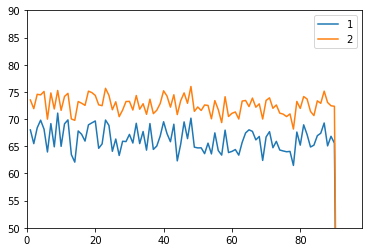

In [278]:
DEP=pd.pivot_table(dead,index=["Sexe","DEP_B"],values=["Age"],aggfunc=[np.mean])

DEP2=DEP['mean']
DEP2
DEP3=pd.pivot_table(dead,index=["DEP_B"],columns='Sexe',values=["Age"])
plt.plot(DEP3)
plt.legend([1,2])
plt.xlim(0,98)
plt.ylim(50,90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    61467
6    60668
5    60341
1    60237
2    59620
4    59384
3    58946
Name: DOD, dtype: int64

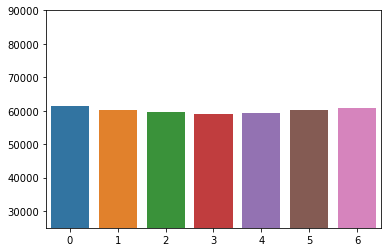

In [80]:
Day=dead['DOD'].dt.dayofweek.value_counts()
sns.barplot(Day.index,Day.values)
plt.gca().set_ylim(25000, 90000)
Day

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2     38703
1     38191
12    38108
3     37259
10    35055
5     34718
4     34626
11    34359
7     34273
6     32435
8     31656
9     31280
Name: DOD, dtype: int64

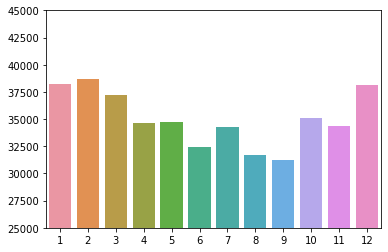

In [81]:
Day=dead['DOD'].dt.month.value_counts()
sns.barplot(Day.index,Day.values)
plt.gca().set_ylim(25000, 45000)
Day

In [51]:
Meuf2021=dead_2021[dead_2021['Sexe']==2]
Kem2021=dead_2021[dead_2021['Sexe']==1]

sns.histplot(Meuf2021['Age'],kde=True,color="y")
sns.histplot(Kem2021['Age'],kde=True,color="r")

Meuf1975=dead_1975[dead_1975['Sexe']==2]
Kem1975=dead_1975[dead_1975['Sexe']==1]

sns.histplot(Meuf1975['Age'],kde=True,color="g")
sns.histplot(Kem1975['Age'],kde=True,color="b")
      

NameError: name 'dead_2021' is not defined

In [ ]:
sns.scatterplot(x=dead_2021['DOB_AAAA'],y=dead_2021['Age'],hue=dead_2021['Sexe'],palette='YlGnBu')

In [ ]:
sns.boxplot(x='DOB_AAAA',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')

In [97]:
All_deads=pd.concat([dead_1975,dead_1985,dead_1995,dead_2005,dead_2021]).reset_index(drop=True)

<AxesSubplot:xlabel='DOB_AAAA', ylabel='Age'>

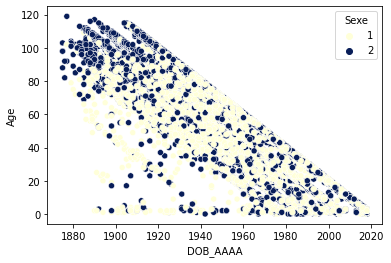

In [115]:
sns.scatterplot(x=All_deads['DOB_AAAA'],y=All_deads['Age'],hue=All_deads['Sexe'],palette='YlGnBu')

<AxesSubplot:xlabel='DOB_AAAA', ylabel='Age'>

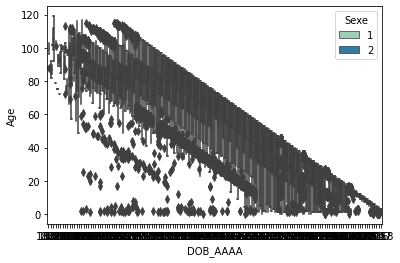

In [116]:
sns.boxplot(x='DOB_AAAA',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')

In [99]:
All_deads.describe()

,Sexe,DOB_AAAA,DOB_MM,DOB_DD,DOD_AAAA,DOD_MM,DOD_DD,Age
count,2.573144e+06,2.573144e+06,2.573144e+06,2.573144e+06,2.573144e+06,2.573144e+06,2.573144e+06,2.573144e+06
mean,1.479075e+00,1.923634e+03,6.365762e+00,1.559772e+01,1.997700e+03,6.358856e+00,1.570011e+01,7.566943e+01
std,4.995620e-01,2.042834e+01,3.452918e+00,8.848039e+00,1.490556e+01,3.528580e+00,8.802009e+00,1.783138e+01
min,1.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,1.890000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.908000e+03,3.000000e+00,8.000000e+00,1.985000e+03,3.000000e+00,8.000000e+00,6.800000e+01
50%,1.000000e+00,1.922000e+03,6.000000e+00,1.600000e+01,1.995000e+03,6.000000e+00,1.600000e+01,8.000000e+01
75%,2.000000e+00,1.934000e+03,9.000000e+00,2.300000e+01,2.005000e+03,9.000000e+00,2.300000e+01,8.800000e+01
max,2.000000e+00,2.018000e+03,1.200000e+01,3.100000e+01,2.018000e+03,1.200000e+01,3.100000e+01,9.960000e+02


,Sexe,DOB_AAAA,DOB_MM,DOB_DD,DOD_AAAA,DOD_MM,DOD_DD,Age
count,2.573140e+06,2.573140e+06,2.573140e+06,2.573140e+06,2.573140e+06,2.573140e+06,2.573140e+06,2.573140e+06
mean,1.479075e+00,1.923636e+03,6.365772e+00,1.559774e+01,1.997700e+03,6.358856e+00,1.570010e+01,7.566822e+01
std,4.995620e-01,2.040493e+01,3.452912e+00,8.848024e+00,1.490557e+01,3.528579e+00,8.802004e+00,1.780484e+01
min,1.000000e+00,1.875000e+03,0.000000e+00,0.000000e+00,1.890000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.908000e+03,3.000000e+00,8.000000e+00,1.985000e+03,3.000000e+00,8.000000e+00,6.800000e+01
50%,1.000000e+00,1.922000e+03,6.000000e+00,1.600000e+01,1.995000e+03,6.000000e+00,1.600000e+01,8.000000e+01
75%,2.000000e+00,1.934000e+03,9.000000e+00,2.300000e+01,2.005000e+03,9.000000e+00,2.300000e+01,8.800000e+01
max,2.000000e+00,2.018000e+03,1.200000e+01,3.100000e+01,2.018000e+03,1.200000e+01,3.100000e+01,1.190000e+02


<AxesSubplot:xlabel='DOB_AAAA', ylabel='Age'>

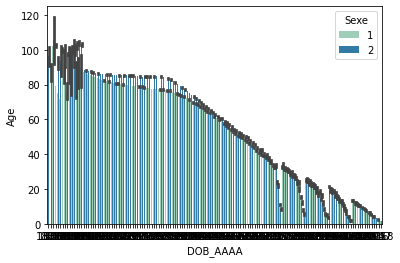

In [117]:
sns.barplot(x='DOB_AAAA',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')

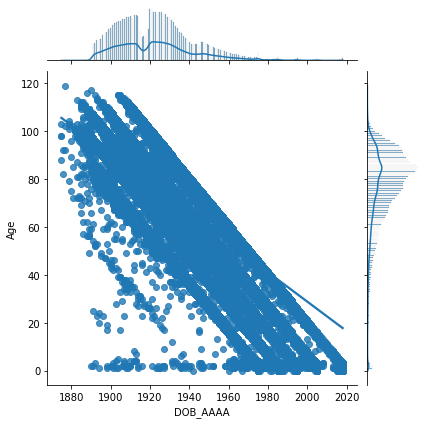

In [118]:
sns.jointplot(x='DOB_AAAA',y='Age',data=All_deads, kind='reg')

In [ ]:
sns.jointplot(x='DOB_AAAA',y='Age',data=All_deads, kind='kde')

In [56]:
dead_1975=add_new_year(1975)
dead_1980=add_new_year(1980)
dead_1985=add_new_year(1985)
dead_1990=add_new_year(1990)
dead_1995=add_new_year(1995)
dead_2000=add_new_year(2000)
dead_2005=add_new_year(2005)
dead_2010=add_new_year(2010)
dead_2015=add_new_year(2015)
dead_2020=add_new_year(2020)

In [114]:
Day=dead_1975['DOD'].dt.dayofweek.value_counts()

Days=pd.DataFrame([dead_1975['DOD'].dt.dayofweek.value_counts(),dead_1980['DOD'].dt.dayofweek.value_counts(),dead_1985['DOD'].dt.dayofweek.value_counts(),dead_1990['DOD'].dt.dayofweek.value_counts(),dead_1995['DOD'].dt.dayofweek.value_counts(),dead_2000['DOD'].dt.dayofweek.value_counts(),dead_2005['DOD'].dt.dayofweek.value_counts(),dead_2010['DOD'].dt.dayofweek.value_counts(),dead_2015['DOD'].dt.dayofweek.value_counts(),dead_2020['DOD'].dt.dayofweek.value_counts()], index=[1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
#sns.barplot(x='DOB_AAAA',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')
Days
DaysT=Days.transpose()
DaysT

,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,57713,63061,69020,79386,75912,82345,80561,79496,88150,97908
1,56643,63813,69087,78191,75605,82229,80183,79520,88290,98224
2,58270,63793,67652,77805,74318,81271,79523,78734,87028,97190
3,56777,61804,67573,77648,74730,81062,79883,78770,86843,97575
4,56845,62488,67438,78516,74833,81594,79678,79223,87550,98255
5,56705,61648,67278,78283,73849,81153,78947,77389,86871,95782
6,55727,60887,66328,76811,72170,79931,77522,76612,84089,94298


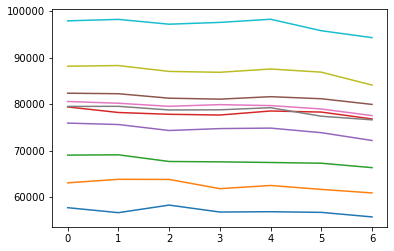

In [115]:
plt.plot(DaysT)

In [121]:
Month=dead_1975['DOD'].dt.month.value_counts()

Months=pd.DataFrame([dead_1975['DOD'].dt.month.value_counts(),dead_1980['DOD'].dt.month.value_counts(),dead_1985['DOD'].dt.month.value_counts(),dead_1990['DOD'].dt.month.value_counts(),dead_1995['DOD'].dt.month.value_counts(),dead_2000['DOD'].dt.month.value_counts(),dead_2005['DOD'].dt.month.value_counts(),dead_2010['DOD'].dt.month.value_counts(),dead_2015['DOD'].dt.month.value_counts(),dead_2020['DOD'].dt.month.value_counts()], index=[1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
#sns.barplot(x='DOB_AAAA',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')
MonthsT=Months.transpose()
MonthsT

,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
1,38409,40402,49178,57682,49680,61777,50491,52621,59569,58146
2,31049,35315,40478,44774,41857,49638,51942,47056,58490,52038
3,34196,35708,43993,46080,47310,46978,55300,48813,56070,63858
4,33442,36602,39064,44756,46672,44134,45121,44968,48713,67638
5,32934,36756,39112,43019,44756,43578,44454,45286,47207,49773
6,31383,34317,35902,41757,42443,42231,42583,42442,45656,46874
7,32099,35781,37275,44212,44696,43712,41469,43238,47811,47910
8,32811,34170,35568,43679,42846,42813,40714,42400,47557,50008
9,30682,32761,33609,40855,41483,41061,40518,42369,45888,50070
10,33923,37122,38012,45303,42996,47117,44301,46534,51234,58888


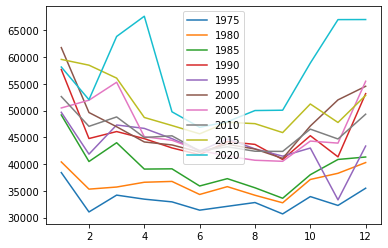

In [129]:
plt.plot(MonthsT)
plt.legend([1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])

In [132]:
All_deads=pd.concat([dead_1975,dead_1980,dead_1985,dead_1990,dead_1995,dead_2000,dead_2005,dead_2015,dead_2020]).reset_index(drop=True)

In [133]:
All_deads.head()

,First,Last,Sexe,DOB,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD,CodeLieuDeces,ActeDecesNumber,Age
0,CLEMENT ANTOINE,THOUNY,1,1904-08-31,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-09-25,1001,3,71.067852
1,JEAN ADOLPHE,MAZUY,1,1905-07-03,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-11-03,1004,4,70.336831
2,CELINE,LONGIN,2,1907-03-26,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-08-05,1146,1,68.362800
3,MARTHE MARIE,BATAILLARD,2,1914-09-04,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-11-27,1335,1,61.230552
4,FRANCOISE,RICHONNIER,2,1896-02-27,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-08-23,1265,9,79.484178


In [150]:
Pivot1=All_deads.pivot_table(index=All_deads['DOB'].dt.month, columns='Sexe', values='Age')

In [151]:
Pivot1[0:30]

Sexe,1,2
DOB,,
1.0,70.735265,78.786087
2.0,70.758838,79.040479
3.0,70.745486,78.965645
4.0,70.644538,78.909396
5.0,70.290033,78.675513
6.0,70.223591,78.603018
7.0,70.109657,78.571664
8.0,70.251603,78.719584
9.0,70.324830,78.769988


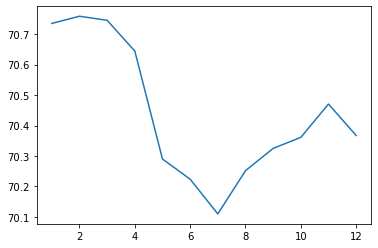

In [152]:
#Pivot1T=Pivot1.transform
plt.plot(Pivot1[1])

In [153]:
Pivot2=All_deads.pivot_table(index=All_deads['Last'], columns='Sexe', values='Age')

In [177]:
Pivot2.index

Index(['', '-BAILLEST', '-BARBAZANGE', '-BERNARD', '-BEYNAT', '-BIAU',
       '-BOUVIER', '-BROCHARD', '-FOURCADE', '-LANDOIS',
       ...
       'ZYWIEC', 'ZYWIECKA', 'ZYWIECKI', 'ZYWINA', 'ZYWIOLEK', 'ZYWOCKI',
       'ZYZANSKI', 'ZYZEK', 'ZYZNOWSKI', 'ZYZYNSKI'],
      dtype='object', name='Last', length=502625)

MARTIN               17025
BERNARD               9169
THOMAS                8061
PETIT                 7880
DURAND                7530
                     ...  
MYCAK                    1
JACQUAINT                1
NICOLAU-BERTHELON        1
BALAU                    1
PAIXAO                   1
Name: Last, Length: 502626, dtype: int64

In [159]:
Toto=All_deads['Last'].value_counts()

In [167]:
Toto.iloc[0:10].index

Index(['MARTIN', 'BERNARD', 'THOMAS', 'PETIT', 'DURAND', 'DUBOIS', 'RICHARD',
       'ROBERT', 'MOREAU', 'LAURENT', 'MICHEL', 'SIMON', 'LEFEBVRE', 'LEROY',
       'ROUX', 'BERTRAND', 'DAVID', 'FOURNIER', 'BONNET', 'GIRARD', 'MOREL',
       'BLANC', 'FAURE', 'LAMBERT', 'VINCENT', 'ROUSSEAU', 'DUPONT', 'ANDRE',
       'MULLER', 'MERCIER', 'GARNIER', 'GUERIN', 'LEFEVRE', 'GAUTHIER',
       'FRANCOIS', 'CHEVALIER', 'LEGRAND', 'PERRIN', 'FONTAINE', 'ROBIN',
       'CLEMENT', 'MATHIEU', 'NICOLAS', 'BOYER', 'ROUSSEL', 'HENRY', 'MORIN',
       'MASSON', 'MARCHAND', 'GARCIA'],
      dtype='object')

In [195]:
Pivot2.loc[Toto.iloc[0:50].index]

Sexe,1,2
MARTIN,71.176555,79.597134
BERNARD,71.214659,79.225335
THOMAS,70.994329,79.406906
PETIT,70.789064,78.813487
DURAND,72.007738,80.020890
DUBOIS,70.399747,78.684765
RICHARD,70.380432,78.963043
ROBERT,70.386046,79.017771
MOREAU,71.408318,79.895666
LAURENT,71.103717,79.014286


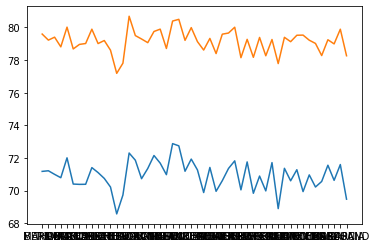

In [198]:
plt.plot(Pivot2.loc[Toto.iloc[0:50].index])

In [200]:
All_deads

,First,Last,Sexe,DOB,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD,CodeLieuDeces,ActeDecesNumber,Age
0,CLEMENT ANTOINE,THOUNY,1,1904-08-31,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-09-25,1001,3,71.067852
1,JEAN ADOLPHE,MAZUY,1,1905-07-03,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-11-03,1004,4,70.336831
2,CELINE,LONGIN,2,1907-03-26,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-08-05,1146,1,68.362800
3,MARTHE MARIE,BATAILLARD,2,1914-09-04,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-11-27,1335,1,61.230552
4,FRANCOISE,RICHONNIER,2,1896-02-27,1001,L'ABERGEMENT-CLEMENCIAT,NaN,1975-08-23,1265,9,79.484178
...,...,...,...,...,...,...,...,...,...,...,...
4792537,JEAN-LOUIS ANDRE ALBERT,FOURNIER,1,1957-08-05,75118,PARIS 18E ARRONDISSEMENT,NaN,2020-02-09,99134,2162,62.514631
4792538,KAMEL,CHITOUR,1,1941-07-27,93352,DEPARTEMENT DE CONSTANTINE,NaN,2020-09-11,99134,2166,79.128250
4792539,WALTRAUD ROSINA,SCHOTTMULLER,2,1930-02-18,99109,LAHR,ALLEMAGNE,2020-11-11,99134,2165,90.731500
4792540,ANDRE CHARLES,MASSONNET,1,1943-10-01,01060,BRENOD,NaN,2020-09-29,99140,3588,76.998159


In [205]:
PivotEtranger=All_deads.pivot_table(index=All_deads['CodeLieuxNaissance'], columns='Sexe', values='Age')

In [206]:
PivotEtranger[0:100]

Sexe,1,2
CodeLieuxNaissance,,
1001,70.007806,80.080529
1002,87.457876,83.276727
1003,67.103363,83.066045
1004,61.938153,74.925389
1005,77.834216,80.546144
...,...,...
1096,71.844181,79.474498
1097,68.326112,80.113897
1098,72.656447,82.928009


In [216]:
#sns.barplot(x='DOD',y='Age',data=All_deads, hue='Sexe', palette='YlGnBu')

<AxesSubplot:xlabel='Sexe', ylabel='Age'>

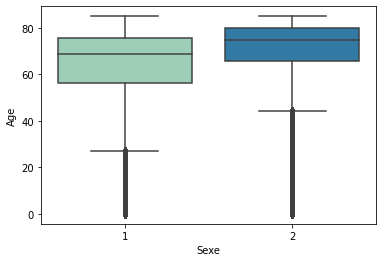

In [215]:
sns.boxplot(x=dead_1975['Sexe'],y=dead_1975['Age'],palette='YlGnBu')

In [220]:
def plot_mortality_year(Year):
    #DOB Filter empty year
    dead = pd.read_fwf('./deces-' + str(Year) + '.txt',widths=(80,1,8,5,30,30,8,5,9),header=0,names=('NomPrenom','Sexe','DOB','CodeLieuxNaissance','AdressseNaissance','Etranger','DOD','CodeLieuDeces','ActeDecesNumber'), encoding= 'unicode_escape')
    dead.drop(dead[dead['DOB']/10**7%10==0].index,inplace=True)
    dead.drop(dead[dead['DOB']/10**6%10==0].index,inplace=True)    
    #DOB Filter empty day and force 00 to 01
    dead['DOB'] = np.where((dead['DOB']%10==0) & (dead['DOB']/10%10==0), dead['DOB'] + 1, dead['DOB'])
    #DOB Filter empty month and force 00 to 01
    dead['DOB'] = np.where((np.trunc(dead['DOB']/100%10)==0) & (np.trunc(dead['DOB']/1000%10)==0), dead['DOB'] + 100, dead['DOB'])
    
    #DOD Filter empty year
    dead.drop(dead[dead['DOD']<19000101].index,inplace=True)
    dead.drop(dead[dead['DOD']/10**7%10==0].index,inplace=True)
    dead.drop(dead[dead['DOD']/10**6%10==0].index,inplace=True)    
    #DOD Filter empty day and force 00 to 01
    dead['DOD'] = np.where((dead['DOD']%10==0) & (dead['DOD']/10%10==0), dead['DOD'] + 1, dead['DOD'])
    #DOD Filter empty month and force 00 to 01
    dead['DOD'] = np.where((np.trunc(dead['DOD']/100%10)==0) & (np.trunc(dead['DOD']/1000%10)==0), dead['DOD'] + 100, dead['DOD'])
    
    #Remove '/' in Col 1
    dead.iloc[:,0]=dead.iloc[:,0].str[:-1]
    #Split Name * Col 1
    dead[['Last','First']] = dead.NomPrenom.str.split("*",expand=True)
    dead.drop(columns='NomPrenom',inplace=True)
    # shift column to first position
    first = dead.pop('Last')
    second = dead.pop('First')

    dead.insert(0, 'Last', first)
    dead.insert(0, 'First', second)
    #Change format DOB, DOD
    dead["DOB"] = pd.to_datetime(dead["DOB"], yearfirst=True, errors='coerce', dayfirst=False, format="%Y%m%d")
    dead["DOD"] = pd.to_datetime(dead["DOD"], yearfirst=True, dayfirst=False, format="%Y%m%d")
    dead["Age"]= (dead["DOD"] - dead["DOB"])/np.timedelta64(1,'Y')
    dead.drop(dead[dead['Age']>130].index,inplace=True)
    dead.drop(dead[dead['Age']<=0].index,inplace=True)
    #Meuf=dead[dead['Sexe']==2]
    #Kem=dead[dead['Sexe']==1]
    #Mortality_plt=sns.histplot(Kem['Age'],bins=120,color="blue")
    #Mortality_plt=sns.histplot(Meuf['Age'],bins=120,color="m")
    #Mortality_plt.set(xlim=(0,120),ylim=(0, 15000))
    #Mortality_plt.set_title('Mortality year: ' + str(Year))
    #plt.savefig('./mortality_' + str(Year) + '.png')  
    #plt.clf()
    Box_plt2=sns.boxplot(x=dead['Sexe'],y=dead['Age'],palette='YlGnBu')
    Box_plt2.set(ylim=(20,120))
    Box_plt2.set_title('Mortality year: ' + str(Year))
    plt.savefig('./Box_plot2_' + str(Year) + '.png')  
    plt.clf()
    
    return dead

In [221]:
for i in np.arange(1970,2022,5):
    plot_mortality_year(i)


<Figure size 432x288 with 0 Axes>

In [222]:
#df.drop('New',axis=1,inplace=True)
#ans7a_ = ans6a.isnull().sum()
All_deads.isnull().sum()

First                       0
Last                        0
Sexe                        0
DOB                         8
CodeLieuxNaissance          0
AdressseNaissance        5385
Etranger              4377464
DOD                         0
CodeLieuDeces             282
ActeDecesNumber          2920
Age                         8
dtype: int64

In [303]:
EXP=pd.pivot_table(All_deads,index="DOD",values="Age",aggfunc=np.mean)
EXP=EXP[EXP.index.year>1970]
EXP.index.year

Int64Index([1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='DOD', length=10488)

<AxesSubplot:xlabel='DOD', ylabel='Age'>

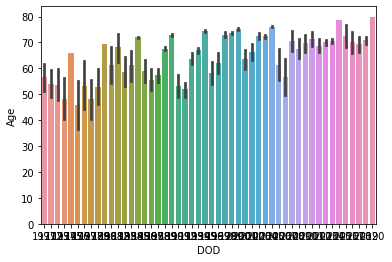

In [304]:
sns.barplot(x=EXP.index.year,y=EXP['Age'])

In [307]:
ALL_FILTERED=All_deads[All_deads['DOD'].dt.year>1970]

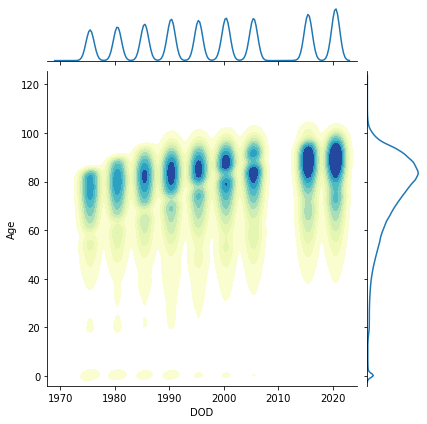

In [314]:
sns.jointplot(x='DOD',y='Age',data=ALL_FILTERED, kind='kde',shade=True,cmap='YlGnBu')